In [11]:
# Import modules 
import matplotlib as mpl
import numpy as np 
import pandas as pd 
import datetime
import os

# Make plots in Notebook
%matplotlib inline

# Load marketing_promo.csv
df = pd.read_csv('/Users/mikeallimb/Documents/Data_science/BBC/New_Data_Analyst/Test/Map_BC', header =0, sep=' ', error_bad_lines=False)


Skipping line 31467: expected 13 fields, saw 14
Skipping line 31469: expected 13 fields, saw 14
Skipping line 31471: expected 13 fields, saw 14
Skipping line 31475: expected 13 fields, saw 14
Skipping line 31477: expected 13 fields, saw 14
Skipping line 31479: expected 13 fields, saw 14
Skipping line 53247: expected 13 fields, saw 14

Skipping line 87220: expected 13 fields, saw 14
Skipping line 87240: expected 13 fields, saw 14
Skipping line 125717: expected 13 fields, saw 14
Skipping line 125718: expected 13 fields, saw 15
Skipping line 125719: expected 13 fields, saw 14
Skipping line 125721: expected 13 fields, saw 14
Skipping line 125723: expected 13 fields, saw 14
Skipping line 125724: expected 13 fields, saw 14
Skipping line 125725: expected 13 fields, saw 14
Skipping line 125726: expected 13 fields, saw 14
Skipping line 125727: expected 13 fields, saw 14

Skipping line 210699: expected 13 fields, saw 14
Skipping line 210704: expected 13 fields, saw 14
Skipping line 210717: expec

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5420857 entries, 21 to 43312443
Data columns (total 13 columns):
Browsers            object
UTC.timestamp       float64
Day                 object
Hour                int64
Entry.type          object
Page                object
Page.URL            object
Previous.page       object
Virtual.site        object
Region              object
Platform            object
Application.type    object
timestamp           datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 579.0+ MB


In [114]:
# Turn Unix Time (ms) to human-readable timestamp
df['timestamp'] = pd.to_datetime(df['UTC.timestamp'], unit='ms')
#df['UTC.timestamp'].astype('datetime64[ms]')
#df['timestamp'].to_pydatetime()
df[:3]

,Browsers,UTC.timestamp,Day,Hour,Entry.type,Page,Page.URL,Previous.page,Virtual.site,Region,Platform,Application.type,timestamp
21,153e489bc01c390a84a96fa888c647c6,1.404636e+12,Jul-06-2014,9,Direct entry,programmes.timeshift.series_12.magnificent_mac...,http://www.bbc.co.uk/programmes/b01n8hl9,NaN,tvandiplayer,greater london,Mobile,responsive,2014-07-06 08:46:58.083
22,35890645ebc7bdb6f3f04ff911bef028,1.404614e+12,Jul-06-2014,3,External referrer,news.technology.page,http://m.bbc.co.uk/news/technology,NaN,news,manchester,Mobile,responsive,2014-07-06 02:32:33.699
23,35890645ebc7bdb6f3f04ff911bef028,1.404614e+12,Jul-06-2014,3,External referrer,news.page,http://m.bbc.co.uk/news,news.technology.page,news,manchester,Mobile,responsive,2014-07-06 02:32:40.340


In [17]:
# Vistor split per platform 
platforms = df['Platform'].unique()
# Mobile, Computer, Tablet, web, responsive 
df_mobile = df[df['Platform'] == 'Mobile']
no_mobile = df_mobile['Browsers'].nunique() 

df_computer = df[df['Platform'] == 'Computer']
no_computer = df_computer['Browsers'].nunique()

df_tablet = df[df['Platform'] == 'Tablet']
no_tablet = df_tablet['Browsers'].nunique()

df_web = df[df['Platform'] == 'web']
no_web = df_web['Browsers'].nunique()

df_responsive = df[df['Platform'] == 'responsive']
no_responsive = df_responsive['Browsers'].nunique()

# Checking unusual platforms 
#df_responsive 
#df_web 

print no_mobile
print no_computer + no_web + no_responsive
print no_tablet

263074
273604
146931


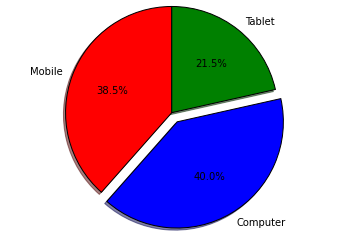

In [25]:
# Make piechart for platform share 
import matplotlib.pyplot as plt

labels = 'Mobile', 'Computer', 'Tablet'
array_platform = [263074, 273604, 146931]
colors = 'Red', 'Blue', 'Green'
explode = (0, 0.1, 0)

plt.pie(array_platform, explode=explode, labels=labels, colors=colors, shadow=True, 
        autopct='%1.1f%%', startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.figure()

In [44]:
# How many uses visited more than one product 
product = df['Virtual.site'].unique()
#product

users_products = {}
for users, users_data in df.groupby("Browsers"):
    users_products[users] = users_data['Virtual.site'].nunique()  
users_products


{'17597a3993764802ad6eed30c2f7254d': 1,
 'c6a291558c3811b295f33ca5d8ec457a': 1,
 '27898e27f1c6c20ecada8d73ef50111d': 2,
 '32bddd617dee9adfc060b3f6e3b32106': 1,
 'b03ba432749714dd24c540833d9cefff': 1,
 'f42309d787bcaa6d9811548418ff9f17': 2,
 '8d76cd7ae011ecc8881623cd0acab340': 3,
 'e0ca8730209763c2c2f7b933b43af177': 1,
 '304ab634b0f7abf2bcc115e788352c8f': 3,
 '0b7e1c1d625f6021ed23757a70051320': 1,
 'cd37088e248b6b80059a2c34a65d44c9': 1,
 '60eb40dfa54b50fd308ce91fa782dd6b': 3,
 '519f3c4d80d100f45955af50788cec81': 1,
 '539d457c7236cafa58ef90b7ed1aeb4e': 1,
 'e207ec2f8b851cb7e4356fb1670d4608': 3,
 '146046ffb5af0b56128d495adc1ae559': 1,
 'ca6e06d34db95178857ec2f000fb1aee': 1,
 'e241f96f4728da2c70ed555c2c6c3715': 1,
 '812b636701896c9a254b291a1704f516': 1,
 '1ed5e6430edc9d38e2fa79b35bec510d': 3,
 '0a136d29f6bfeae9d6130ab6ef116395': 2,
 '8d35965b3d450c0961fd40e8390e909a': 1,
 '1e5ca83f94e7ff26fc488dd579f3d056': 1,
 '601ad7030e366cf0d23fd7ba47f45ab3': 1,
 '9a8eb17cf23dd6e2530aa89cf6fab389': 1,


In [ ]:
# Plot the users (this takes ages!)
plt.bar(range(len(users_products)), users_products.values(), align='center')
plt.xticks(range(len(users_products)), users_products.keys())

plt.show()

In [39]:
test = df.groupby(['Browsers'])['Virtual.site'].nunique().reset_index()

ERROR! Session/line number was not unique in database. History logging moved to new session 183


,Browsers,Virtual.site
0,000025d39a674fe49556335113bd3217,2
1,00004aa865a88dae215794ed80da50aa,1
2,00009cf058c3e4e94065fb9fe3dad2b7,2
3,0000a5c3801ad319f5668295aaa9db7f,1
4,0000e04fec6aca96b4f8964f411a2643,1


In [43]:
# Total number of indivdual users in the day: 683611
test.count()

Browsers        683611
Virtual.site    683611
dtype: int64

In [47]:
# How many users visited more than one product? 238326
over_1 = test[test['Virtual.site'] >= 2].count()
over_1

Browsers        238326
Virtual.site    238326
dtype: int64

In [305]:
test2 = df.groupby(['Virtual.site'])['Browsers'].nunique().reset_index()
new_test = test2[:25].sort(columns=['Browsers'], ascending=False)
newest_value = new_test[:10]
newest_value[:12]

,Virtual.site,Browsers
13,sport,328383
8,news,240347
15,weatherandtravelnews,154792
5,homepage,133982
14,tvandiplayer,82995
10,rm,47511
6,kl,34714
11,search,7723
2,cbeebies,7040
3,corporate,5495


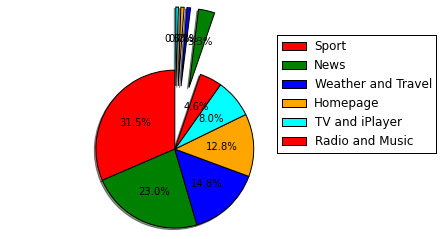

In [314]:
newest_sample = newest_value['Browsers'].values
newest_sample
label_sites = ['Sport', 'News', 'Weather and Travel', 'Homepage', 'TV and iPlayer',
              'Radio and Music']

explode = (0, 0, 0, 0, 0, 0, 0.8, 0.8, 0.8, 0.8)

plt.pie(newest_sample, explode=explode, colors=colors, shadow=True, 
        autopct='%1.1f%%', startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.legend(label_sites, loc='upper right', bbox_to_anchor = (1.3, 0.9))
plt.figure()

In [96]:
# How many users visited more than one product? 2 
over_10 = test[test['Virtual.site'] >= 10].count()
over_10

Browsers        2
Virtual.site    2
dtype: int64

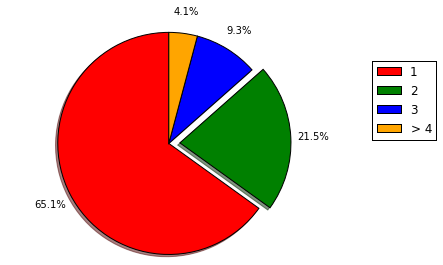

In [94]:
# Plot Product Data 

one = test['Virtual.site'][test['Virtual.site'] == 1].count()
two = test['Virtual.site'][test['Virtual.site'] == 2].count()
three = test['Virtual.site'][test['Virtual.site'] == 3].count()
four = test['Virtual.site'][test['Virtual.site'] == 4].count()
greater_four = test['Virtual.site'][test['Virtual.site'] >= 4].count()
five = test['Virtual.site'][test['Virtual.site'] == 5].count()
six = test['Virtual.site'][test['Virtual.site'] == 6].count()
seven = test['Virtual.site'][test['Virtual.site'] == 7].count()
eight = test['Virtual.site'][test['Virtual.site'] == 8].count()
nine = test['Virtual.site'][test['Virtual.site'] == 9].count()
ten = test['Virtual.site'][test['Virtual.site'] == 10].count()

labels = '1', '2', '3', '> 4'
array_platform = [one, two, three, greater_four]
colors = 'r', 'g', 'b', 'orange'
explode = (0, 0.1, 0, 0)

plt.pie(array_platform, explode=explode, labels=None, colors=colors, shadow=True, 
        autopct='%1.1f%%', pctdistance=1.2, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9))
plt.figure()

In [99]:
# Plot number of visitors use more than one product?
print(over_1)
# Plot number of vistorts who used more than 10 products?
print(over_10)

Browsers        238326
Virtual.site    238326
dtype: int64
Browsers        2
Virtual.site    2
dtype: int64


In [119]:
df[:3]

,Browsers,UTC.timestamp,Day,Hour,Entry.type,Page,Page.URL,Previous.page,Virtual.site,Region,Platform,Application.type,timestamp
21,153e489bc01c390a84a96fa888c647c6,1.404636e+12,Jul-06-2014,9,Direct entry,programmes.timeshift.series_12.magnificent_mac...,http://www.bbc.co.uk/programmes/b01n8hl9,NaN,tvandiplayer,greater london,Mobile,responsive,2014-07-06 08:46:58.083
22,35890645ebc7bdb6f3f04ff911bef028,1.404614e+12,Jul-06-2014,3,External referrer,news.technology.page,http://m.bbc.co.uk/news/technology,NaN,news,manchester,Mobile,responsive,2014-07-06 02:32:33.699
23,35890645ebc7bdb6f3f04ff911bef028,1.404614e+12,Jul-06-2014,3,External referrer,news.page,http://m.bbc.co.uk/news,news.technology.page,news,manchester,Mobile,responsive,2014-07-06 02:32:40.340


In [319]:
# Trend in usage over the day? For sport? For iplayer?
#df[:3]
# Plot hour vs total count (and all the different products counting)
# Count the total no of entries on each hour and plot 
# hours (x), count (usage, right)
df_sort_hour = df.sort(columns=['Hour'])
hour_subset = df_sort_hour.groupby(['Hour'])['Browsers'].nunique().reset_index()
hour_subset['Hour_shift'] = hour_subset['Hour'] + 0.5
hour_subset['mean'] = hour_subset['Browsers'].mean()
hour_subset[:26]

,Hour,Browsers,Hour_shift,mean
0,0,43509,0.5,55507.916667
1,1,19547,1.5,55507.916667
2,2,11506,2.5,55507.916667
3,3,7432,3.5,55507.916667
4,4,6063,4.5,55507.916667
5,5,8602,5.5,55507.916667
6,6,18282,6.5,55507.916667
7,7,39937,7.5,55507.916667
8,8,63522,8.5,55507.916667
9,9,73997,9.5,55507.916667


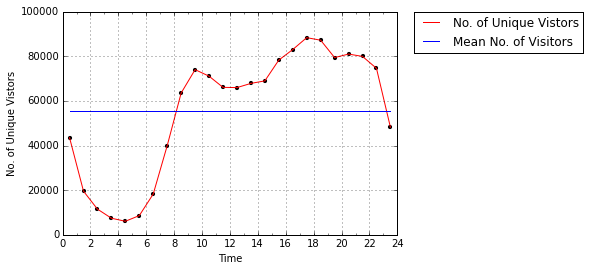

In [317]:
# Plot usage over the day 
import matplotlib.ticker as ticker

hour_subset['mean'] = hour_subset['Browsers'].mean()
plt.plot(hour_subset['Hour_shift'], hour_subset['Browsers'], color='red'
         , label='No. of Unique Vistors')
plt.plot(hour_subset['Hour_shift'], hour_subset['mean'], color='blue', 
         label='Mean No. of Visitors')
plt.scatter(hour_subset['Hour_shift'], hour_subset['Browsers'], 
            color='black',
            s=10.0)
plt.ylabel('No. of Unique Vistors')
plt.xlabel('Time')
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xlim([0,24])
plt.grid(True)
plt.legend(loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()
# Device usage by product?
# Then can plot on the same but sub divided by virtual site as well, j
# sort out by making a new dateframe from each platform
# Line plot for each

In [183]:
# Device usage by product?
hour_site_subset = df_sort_hour.groupby(['Hour','Virtual.site'])['Browsers'].nunique().reset_index()
hour_site_subset['Hour_shift'] = hour_site_subset['Hour'] + 0.5
hour_site_subset[:10]

,Hour,Virtual.site,Browsers,Hour_shift
0,0,cbbc,74,0.5
1,0,cbeebies,59,0.5
2,0,corporate,183,0.5
3,0,homepage,8089,0.5
4,0,kl,662,0.5
5,0,news,13763,0.5
6,0,other,17,0.5
7,0,rm,1528,0.5
8,0,search,216,0.5
9,0,sport,23896,0.5


In [193]:
# Need to split up platforms more effectively 

## News 
news_subset = df_sort_hour[df_sort_hour['Virtual.site'] == 'news']
hour_news_subset = news_subset.groupby(['Hour'])['Browsers'].nunique().reset_index()
hour_news_subset['Hour_shift'] = hour_news_subset['Hour'] + 0.5
#hour_news_subset[:26]

## Sport
sport_subset = df_sort_hour[df_sort_hour['Virtual.site'] == 'sport']
hour_sport_subset = sport_subset.groupby(['Hour'])['Browsers'].nunique().reset_index()
hour_sport_subset['Hour_shift'] = hour_sport_subset['Hour'] + 0.5
#hour_sport_subset[:26]

## Weather and travel News
weathertravel_subset = df_sort_hour[df_sort_hour['Virtual.site'] 
                                    == 'weatherandtravelnews']
hour_weathertravel_subset = weathertravel_subset.groupby(['Hour'])['Browsers'].nunique().reset_index()
hour_weathertravel_subset['Hour_shift'] = hour_weathertravel_subset['Hour'] + 0.5
#hour_weathertravel_subset[:26]

## Homepage 
homepage_subset = df_sort_hour[df_sort_hour['Virtual.site'] 
                                    == 'homepage']
hour_homepage_subset = homepage_subset.groupby(['Hour'])['Browsers'].nunique().reset_index()
hour_homepage_subset['Hour_shift'] = hour_homepage_subset['Hour'] + 0.5
#hour_homepage_subset[:26]

## Search
search_subset = df_sort_hour[df_sort_hour['Virtual.site'] 
                                    == 'search']
hour_search_subset = search_subset.groupby(['Hour'])['Browsers'].nunique().reset_index()
hour_search_subset['Hour_shift'] = hour_search_subset['Hour'] + 0.5
#hour_search_subset[:26]

## tvandiplayer
tvandiplayer_subset = df_sort_hour[df_sort_hour['Virtual.site'] 
                                    == 'tvandiplayer']
hour_tvandiplayer_subset = tvandiplayer_subset.groupby(['Hour'])['Browsers'].nunique().reset_index()
hour_tvandiplayer_subset['Hour_shift'] = hour_tvandiplayer_subset['Hour'] + 0.5
#hour_tvandiplayer_subset[:26]

## cbbc
cbbc_subset = df_sort_hour[df_sort_hour['Virtual.site'] 
                                    == 'cbbc']
hour_cbbc_subset = cbbc_subset.groupby(['Hour'])['Browsers'].nunique().reset_index()
hour_cbbc_subset['Hour_shift'] = hour_cbbc_subset['Hour'] + 0.5
#hour_cbbc_subset[:26]

## cbeebies
cbeebies_subset = df_sort_hour[df_sort_hour['Virtual.site'] 
                                    == 'cbeebies']
hour_cbeebies_subset = cbeebies_subset.groupby(['Hour'])['Browsers'].nunique().reset_index()
hour_cbeebies_subset['Hour_shift'] = hour_cbeebies_subset['Hour'] + 0.5
#hour_cbeebies_subset[:26]

# Radio & Music  
rm_subset = df_sort_hour[df_sort_hour['Virtual.site'] 
                                    == 'rm']
hour_rm_subset = rm_subset.groupby(['Hour'])['Browsers'].nunique().reset_index()
hour_rm_subset['Hour_shift'] = hour_rm_subset['Hour'] + 0.5
#hour_rm_subset[:26]

# Knowledge and Learning  
kl_subset = df_sort_hour[df_sort_hour['Virtual.site'] 
                                    == 'kl']
hour_kl_subset = kl_subset.groupby(['Hour'])['Browsers'].nunique().reset_index()
hour_kl_subset['Hour_shift'] = hour_kl_subset['Hour'] + 0.5
hour_kl_subset[:26]

,Hour,Browsers,Hour_shift
0,0,662,0.5
1,1,298,1.5
2,2,169,2.5
3,3,106,3.5
4,4,88,4.5
5,5,82,5.5
6,6,240,6.5
7,7,680,7.5
8,8,1367,8.5
9,9,2030,9.5


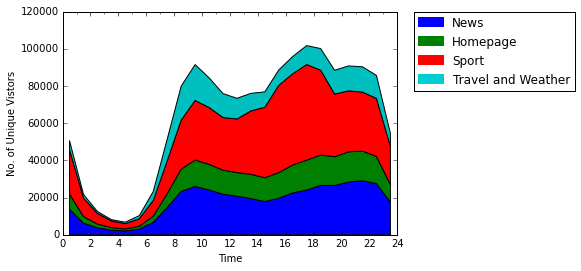

In [320]:
# Plot usage per product 
# Plot stackplot 
# News, Sport, Weatherandtravel
from matplotlib import pyplot as plt

areaLabels=['News','Homepage', 'Sport', 'Travel and Weather']
fig, ax = plt.subplots()
ax.stackplot(hour_news_subset['Hour_shift'], 
             hour_news_subset['Browsers'],
             hour_homepage_subset['Browsers'],
             hour_sport_subset['Browsers'], 
             hour_weathertravel_subset['Browsers'])

#plt.plot(hour_subset['Hour_shift'], hour_subset['Browsers'], color='black'
#         , label='No. of Unique Users')

## Labels on plot
#loc = hour_news_subset['Browsers'].argmax()
#ax.text(loc, hour_news_subset['Browsers'][loc]*0.25, areaLabels[0])

#loc = hour_sport_subset['Browsers'].argmax()
#ax.text(loc, hour_news_subset['Browsers'][loc] + hour_sport_subset['Browsers'][loc]*0.33, 
#        areaLabels[1])

#loc = hour_weathertravel_subset['Browsers'].argmax()
#ax.text(loc, hour_news_subset['Browsers'][loc] + hour_sport_subset['Browsers'][loc] 
#       + hour_weathertravel_subset['Browsers'][loc]*0.75, areaLabels[2])

plt.ylabel('No. of Unique Vistors')
plt.xlabel('Time')

ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xlim([0,24]) 

# Make legend 
# Proxy plot 
plt.plot([], [], color='blue', linewidth=10)
plt.plot([], [], color='green', linewidth=10)
plt.plot([], [], color='red', linewidth=10)
plt.plot([], [], color='darkturquoise', linewidth=10)

plt.legend([areaLabels[0], areaLabels[1], areaLabels[2], areaLabels[3]], 
           loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.show()

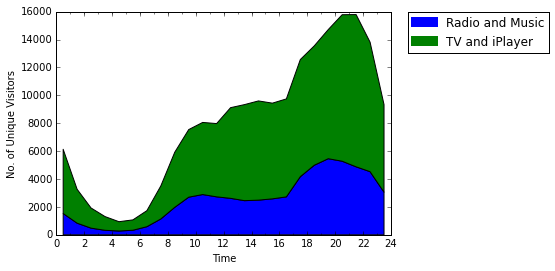

In [325]:
# Plot usage per product 
# Plot stackplot 
# Iplayer and Radio / Music 
from matplotlib import pyplot as plt

areaLabels=['TV and iPlayer', 'Radio and Music']
fig, ax = plt.subplots()
ax.stackplot(hour_tvandiplayer_subset['Hour_shift'], 
             hour_rm_subset['Browsers'],
            hour_tvandiplayer_subset['Browsers'])

plt.ylabel('No. of Unique Visitors')
plt.xlabel('Time')

ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xlim([0,24]) 

# Make legend 
# Proxy plot 
plt.plot([], [], color='blue', linewidth=10)
plt.plot([], [], color='green', linewidth=10)
#plt.plot([], [], color='red', linewidth=10)
#plt.plot([], [], color='darkturquoise', linewidth=10)

plt.legend([areaLabels[1], areaLabels[0]], 
           loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.show()

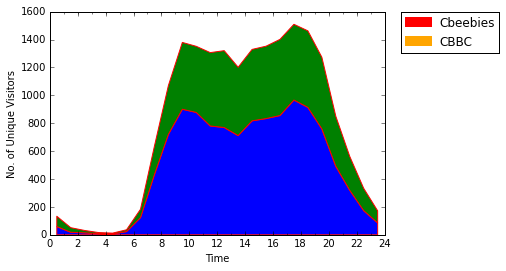

In [327]:
# Plot usage per product 
# Plot stackplot 
# Iplayer and Radio / Music 
from matplotlib import pyplot as plt

areaLabels=['Cbeebies', 'CBBC']
fig, ax = plt.subplots()
ax.stackplot(hour_cbbc_subset['Hour_shift'], 
             hour_cbeebies_subset['Browsers'],
             hour_cbbc_subset['Browsers'], color=['red', 'orange'])

plt.ylabel('No. of Unique Visitors')
plt.xlabel('Time')

ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xlim([0,24]) 

# Make legend 
# Proxy plot 
plt.plot([], [], color='red', linewidth=10)
plt.plot([], [], color='orange', linewidth=10)
#plt.plot([], [], color='red', linewidth=10)
#plt.plot([], [], color='darkturquoise', linewidth=10)

plt.legend([areaLabels[0], areaLabels[1]], 
           loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.show()

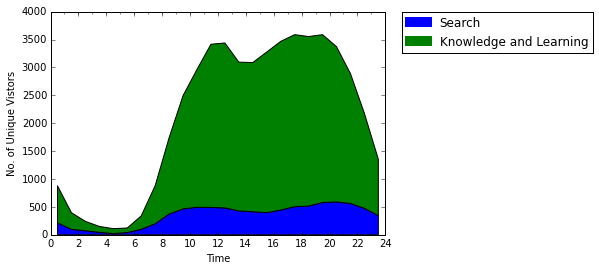

In [324]:
# Plot usage per product 
# Plot stackplot 
# Iplayer and Radio / Music 
from matplotlib import pyplot as plt

areaLabels=['Search', 'Knowledge and Learning']
fig, ax = plt.subplots()
ax.stackplot(hour_search_subset['Hour_shift'], 
             hour_search_subset['Browsers'],
             hour_kl_subset['Browsers'])

plt.ylabel('No. of Unique Vistors')
plt.xlabel('Time')

ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xlim([0,24]) 

# Make legend 
# Proxy plot 
plt.plot([], [], color='blue', linewidth=10)
plt.plot([], [], color='green', linewidth=10)
#plt.plot([], [], color='red', linewidth=10)
#plt.plot([], [], color='darkturquoise', linewidth=10)

plt.legend([areaLabels[0], areaLabels[1]], 
           loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.show()

In [226]:
users_plat_subset = df.groupby(['Browsers'])['Virtual.site'].nunique().reset_index()
users_plat_subset[:10]

,Browsers,Virtual.site
0,000025d39a674fe49556335113bd3217,2
1,00004aa865a88dae215794ed80da50aa,1
2,00009cf058c3e4e94065fb9fe3dad2b7,2
3,0000a5c3801ad319f5668295aaa9db7f,1
4,0000e04fec6aca96b4f8964f411a2643,1
5,0000e31c2a9e22eff0edb40aa1a183eb,1
6,0001025ec02bfb7dd0fac520c147fdf1,1
7,00010a068d41ed1319421944193ed326,1
8,00010d48c1ad104acdd3be7c4fb392bb,2
9,0001163e6dc333a4a6f198bbb0c44917,1


In [228]:
users_plat_sort_subset = users_plat_subset.sort(columns=['Virtual.site'], ascending=False)
users_plat_sort_subset[:5]
# Top platform users
# 1) eeb0c646082e985ad0cf085615c7b91a (user_1)
# 2) f7118ed3230eb1509dd9017247498d49 (user_2)
# 3) 35fa8bacec36d0391370dcaa274abebc (user_3)

,Browsers,Virtual.site
637641,eeb0c646082e985ad0cf085615c7b91a,10
659918,f7118ed3230eb1509dd9017247498d49,10
144117,35fa8bacec36d0391370dcaa274abebc,9
653016,f4761678fc304d2b7511a49610a1f2d4,9
435725,a3315f04a4eda8acfc54e2663250bfe4,9


In [232]:
# Extract data user 1 and sort by timestamp 
df_user1 = df[df['Browsers'] == 'eeb0c646082e985ad0cf085615c7b91a']
df_user1 = df_user1.sort(columns=['timestamp'])
df_user1.shape
# 179 entries 
# From west_berkshire 
# access mobile 
# start at approx 1 and finished browsing at 9 
df_user1.tail()

,Browsers,UTC.timestamp,Day,Hour,Entry.type,Page,Page.URL,Previous.page,Virtual.site,Region,Platform,Application.type,timestamp
28065071,eeb0c646082e985ad0cf085615c7b91a,1.404680e+12,Jul-06-2014,21,Direct entry,news.business.correspondent_story.28159326.page,http://m.bbc.co.uk/news/business-28159326,news.magazine.story.28128028.page,news,west berkshire,Mobile,responsive,2014-07-06 20:54:31.230
28065084,eeb0c646082e985ad0cf085615c7b91a,1.404680e+12,Jul-06-2014,21,Direct entry,news.politics.story.28182376.page,http://m.bbc.co.uk/news/uk-politics-28182376,news.business.correspondent_story.28159326.page,news,west berkshire,Mobile,responsive,2014-07-06 20:54:51.592
28065098,eeb0c646082e985ad0cf085615c7b91a,1.404680e+12,Jul-06-2014,21,Direct entry,news.world.middle_east.story.28182704.page,http://m.bbc.co.uk/news/world-middle-east-2818...,news.politics.story.28182376.page,news,west berkshire,Mobile,responsive,2014-07-06 20:55:08.458
28065112,eeb0c646082e985ad0cf085615c7b91a,1.404680e+12,Jul-06-2014,21,Direct entry,news.world.middle_east.story.28177424.page,http://m.bbc.co.uk/news/world-middle-east-2817...,news.world.middle_east.story.28182704.page,news,west berkshire,Mobile,responsive,2014-07-06 20:55:40.366
28065127,eeb0c646082e985ad0cf085615c7b91a,1.404680e+12,Jul-06-2014,21,Direct entry,news.world.middle_east.story.28177424.page,http://m.bbc.co.uk/news/world-middle-east-2817...,news.world.middle_east.story.28177424.page,news,west berkshire,Mobile,responsive,2014-07-06 20:59:30.040


In [244]:
df_user1_products = df_user1.groupby(['Virtual.site'])['Browsers'].count().reset_index()
df_user1_products[:11]
plot_array = df_user1_products['Browsers'].values
value_array = df_user1_products['Virtual.site'].values
print plot_array
print value_array

[ 3  4 40  1 39 20  2  3 15 52]
['cbbc' 'cbeebies' 'homepage' 'kl' 'news' 'rm' 'search' 'sport'
 'tvandiplayer' 'weatherandtravelnews']


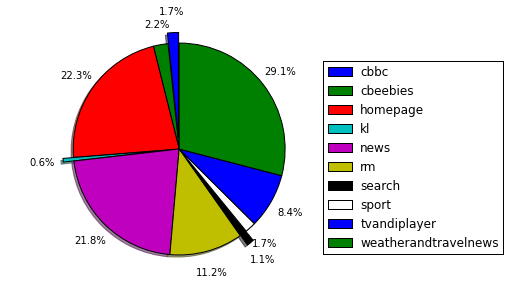

In [260]:
# Plot user_1 product usage 
array_platform = [one, two, three, greater_four]
colors = 'r', 'g', 'b', 'orange', 'cyan'
explode = (0.1, 0, 0, 0.1, 0, 0, 0.11, 0, 0, 0)

plt.pie(plot_array, explode=explode, labels=None, shadow=True, 
        autopct='%1.1f%%', pctdistance=1.2, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.legend(value_array, loc='upper right', bbox_to_anchor = (1.5, 0.9))
plt.figure()
# Counter clockwise from 1.7 % = cbbc 

In [273]:
# When does this take place in the day 
# Homepage 
df_u1_homepage = df_user1[df_user1['Virtual.site'] == 'homepage'].sort(columns='Hour')
df_u1_homepage_group = df_u1_homepage.groupby(['Hour'])['Page'].count().reset_index()
#df_u1_homepage_group[:5]

# News 
df_u1_news = df_user1[df_user1['Virtual.site'] == 'news'].sort(columns='Hour')
df_u1_news_group = df_u1_news.groupby(['Hour'])['Page'].count().reset_index()
#df_u1_news_group[:10]

# Radio
df_u1_rm = df_user1[df_user1['Virtual.site'] == 'rm'].sort(columns='Hour')
df_u1_rm_group = df_u1_rm.groupby(['Hour'])['Page'].count().reset_index()
#df_u1_rm_group[:10]

# iplayer
df_u1_tvandiplayer = df_user1[df_user1['Virtual.site'] == 'tvandiplayer'].sort(columns='Hour')
df_u1_tvandiplayer_group = df_u1_tvandiplayer.groupby(['Hour'])['Page'].count().reset_index()
#df_u1_tvandiplayer_group[:10]

# weather and travel 
df_u1_weather = df_user1[df_user1['Virtual.site'] == 'weatherandtravelnews'].sort(columns='Hour')
df_u1_weather_group = df_u1_weather.groupby(['Hour'])['Page'].count().reset_index()
df_u1_weather_group[:10]

,Hour,Page
0,14,24
1,18,16
2,20,10
3,21,2


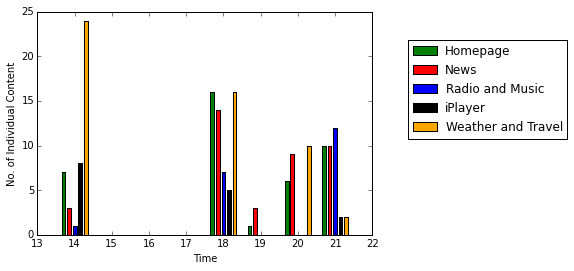

In [329]:
# Plot time of day results 

x_homepage = df_u1_homepage_group['Hour'].values
y_homepage = df_u1_homepage_group['Page'].values

x_news = df_u1_news_group['Hour'].values
y_news = df_u1_news_group['Page'].values

x_rm = df_u1_rm_group['Hour'].values
y_rm = df_u1_rm_group['Page'].values

x_tvandiplayer = df_u1_tvandiplayer_group['Hour'].values
y_tvandiplayer = df_u1_tvandiplayer_group['Page'].values

x_weather = df_u1_weather_group['Hour'].values
y_weather = df_u1_weather_group['Page'].values

ax = plt.subplot(111)
ax.bar(x_homepage-0.3, y_homepage,width=0.1, color='g', align='center',
      label='Homepage')
ax.bar(x_news-0.15, y_news,width=0.1, color='r', align='center',
      label='News')
ax.bar(x_rm, y_rm,width=0.1, color='b', align='center', 
       label='Radio and Music')
ax.bar(x_tvandiplayer+0.15, y_tvandiplayer,width=0.1, color='black', 
       align='center', label='iPlayer')
ax.bar(x_weather+0.3, y_weather,width=0.1, color='orange', align='center',
      label='Weather and Travel')

#ax.bar(x, z,width=0.2,color='g',align='center')
#ax.bar(x+0.2, k,width=0.2,color='r',align='center')
#ax.xaxis_date()

plt.ylabel('No. of Individual Content')
plt.xlabel('Time')
plt.legend(loc='upper right', bbox_to_anchor = (1.6, 0.9))
plt.show()